In [7]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as stats

# Input File (CSV) and initialize the yelp data
input_data_file = "yelp_clean.csv"
df = pd.read_csv(input_data_file)

In [3]:
# organize data for plotting
sm_df = df[["restaurant", "recent_health_score", "recent_health_risk", "average_health_score", 
                 "zipcode", "rating", "price", "review_count", "cuisine"]]
american = sm_df.loc[(sm_df["cuisine"] == "American")]
chinese = sm_df.loc[(sm_df["cuisine"] == "Chinese")]
indian = sm_df.loc[(sm_df["cuisine"] == "Indian")]
italian = sm_df.loc[(sm_df["cuisine"] == "Italian")]
japanese = sm_df.loc[(sm_df["cuisine"] == "Japanese")]
korean = sm_df.loc[(sm_df["cuisine"] == "Korean")]
mediterranean = sm_df.loc[(sm_df["cuisine"] == "Mediterranean")]
mexican = sm_df.loc[(sm_df["cuisine"] == "Mexican")]
other = sm_df.loc[(sm_df["cuisine"] == "Other")]
thai = sm_df.loc[(sm_df["cuisine"] == "Thai")]
vietnamese = sm_df.loc[(sm_df["cuisine"] == "Vietnamese")]
box_data = [american["average_health_score"], chinese["average_health_score"], indian["average_health_score"], 
           italian["average_health_score"], japanese["average_health_score"], korean["average_health_score"],
           mediterranean["average_health_score"], mexican["average_health_score"],
           thai["average_health_score"], vietnamese["average_health_score"], other["average_health_score"]]

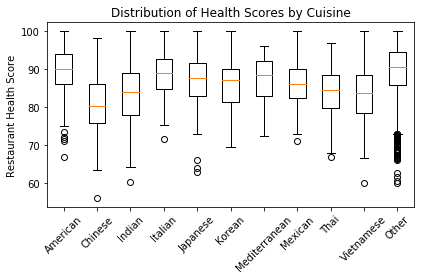

In [26]:
# o = outliers, -- = median, triangle = mean
box_labels = ["American", "Chinese", "Indian", "Italian", "Japanese", "Korean","Mediterranean", 
          "Mexican", "Thai", "Vietnamese", "Other"]
box = plt.boxplot(box_data, labels=box_labels)
plt.xticks(rotation=45)
plt.title("Distribution of Health Scores by Cuisine")
plt.ylabel("Restaurant Health Score")
plt.tight_layout()
plt.savefig("cuisine_boxplot.png")

In [24]:
# How do we know if any of the cuisines are statistically different?
# Perform the ANOVA
stats.f_oneway(american["average_health_score"], chinese["average_health_score"], indian["average_health_score"], 
           italian["average_health_score"], japanese["average_health_score"], korean["average_health_score"],
           mediterranean["average_health_score"], mexican["average_health_score"],
           thai["average_health_score"], vietnamese["average_health_score"])

F_onewayResult(statistic=23.541522717318838, pvalue=4.4140406840675405e-37)